# Working With Timeseries Data Exercises

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydataset
import vega_datasets

## SF Temps

In [5]:
df = vega_datasets.data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [3]:
df.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [7]:
df = df.set_index('date')

<AxesSubplot:title={'center':'Average temp over time'}, xlabel='date'>

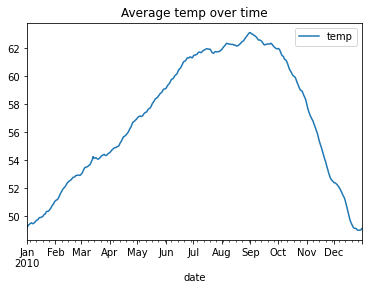

In [5]:
df.resample('D').mean().plot(title='Average temp over time')

<AxesSubplot:title={'center':'max temp over time'}, xlabel='date'>

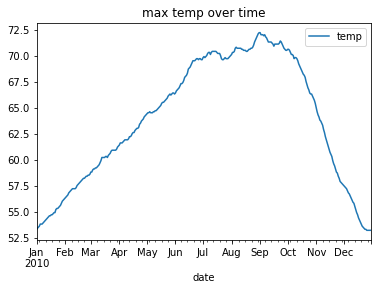

In [6]:
df.resample('D').max().plot(title='max temp over time')

<AxesSubplot:title={'center':'min temp over time'}, xlabel='date'>

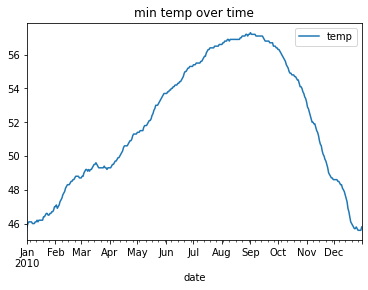

In [7]:
df.resample('D').min().plot(title='min temp over time')

In [8]:
df.resample('D').mean().resample('M').mean().sort_values('temp').index[0]

Timestamp('2010-01-31 00:00:00')

In [3]:
l = [1, 2, 3]
l[-1]

3

In [10]:
df.resample('M').mean().sort_values('temp').index[-1]

Timestamp('2010-09-30 00:00:00')

In [10]:
daily = df.temp.resample('D').agg(['min', 'max'])
daily['delta_temp'] = daily['max'] - daily['min']
daily.head()

,min,max,delta_temp
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7


In [11]:
daily.resample('M').delta_temp.mean().sort_values().index[-1]

Timestamp('2010-09-30 00:00:00')

## Seattle Weather

In [25]:
df = vega_datasets.data.seattle_weather()
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [29]:
df.set_index('date').groupby('weather').resample('Y').size().unstack(0)

weather,drizzle,fog,rain,snow,sun
date,,,,,
2012-12-31,31.0,5.0,191.0,21.0,118.0
2013-12-31,16.0,82.0,60.0,2.0,205.0
2014-12-31,0.0,151.0,3.0,NaN,211.0
2015-12-31,7.0,173.0,5.0,NaN,180.0


In [13]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month

In [14]:
df.groupby(['year', 'month']).precipitation.sum().sort_values().tail()

year  month
2012  3        183.0
      11       210.5
2015  11       212.6
2014  3        240.0
2015  12       284.5
Name: precipitation, dtype: float64

<AxesSubplot:xlabel='date'>

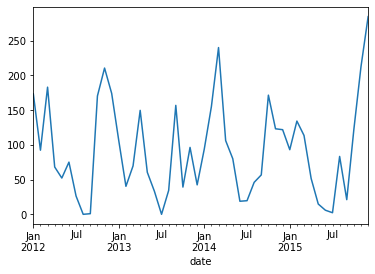

In [15]:
df.set_index('date').resample('M').precipitation.sum().plot()

<AxesSubplot:xlabel='date'>

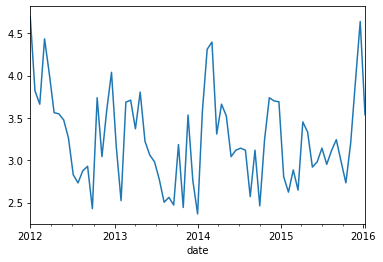

In [16]:
df.set_index('date').wind.resample('3W').mean().plot()

In [17]:
df.groupby(['year', 'month']).wind.mean().sort_values().tail()

year  month
2012  2        3.903448
2014  11       3.983333
2012  3        4.248387
2015  12       4.341935
2014  2        4.528571
Name: wind, dtype: float64

In [18]:
df[df.weather == 'sun'].groupby('year').size()

year
2012    118
2013    205
2014    211
2015    180
dtype: int64

In [19]:
df.groupby('month').precipitation.sum().sort_values().tail(1)

month
11    642.5
Name: precipitation, dtype: float64

In [20]:
df['did_rain'] = df.precipitation > 0

In [21]:
df.groupby('month').did_rain.sum().sort_values().tail(1)

month
12    81
Name: did_rain, dtype: int64

## Flights

In [20]:
df = vega_datasets.data.flights_20k()
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [13]:
pd.Series([-1, 0, 1, 2, 3]).clip(lower=0, upper=2)

0    0
1    0
2    1
3    2
4    2
dtype: int64

In [24]:
s = pd.Series([-1, 0, 1, 2, 3])
s.where(s >= 0, 0)

0    0
1    0
2    1
3    2
4    3
dtype: int64

In [23]:
df.delay = np.where(df.delay < 0, 0, df.delay)

In [21]:
num = df._get_numeric_data()
num[num < 0] = 0

In [24]:
df.groupby(df.date.dt.hour).delay.mean().sort_values().tail(3)

date
0    127.916667
1    170.000000
3    302.500000
Name: delay, dtype: float64

In [25]:
df.groupby(df.date.dt.day_name()).delay.mean().sort_values()

date
Monday        7.165772
Saturday      8.431498
Tuesday       9.410866
Sunday       10.413542
Wednesday    11.032478
Thursday     12.821322
Friday       17.757596
Name: delay, dtype: float64

In [26]:
df.groupby(df.date.dt.month).delay.mean().sort_values()

date
3     9.875287
1    11.301592
2    12.306106
Name: delay, dtype: float64